In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
## Functions
-------------------------------------------------
'''
def clean_trim_year(value):
    value = str(value)
    result = value[6:]
    return result

In [3]:
# import file of monthly sunspots with ; as delimiter
path = "sunspot_monthly.csv"
sun_m_data = pd.read_csv(path, sep = ";")
sun_m_data.head()

,Year,Month,Date (fraction of year),Monthly Mean Total,Monthly Mean SD,Number of Observations,Definitive/Provisional
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


In [4]:
#remove all years before temp data, reset index num
sun_m_1895 = sun_m_data[sun_m_data["Year"] >= 1895]
sun_m_1895 = sun_m_1895.reset_index(drop=True)
sun_m_1895.head()

,Year,Month,Date (fraction of year),Monthly Mean Total,Monthly Mean SD,Number of Observations,Definitive/Provisional
0,1895,1,1895.042,105.4,9.2,31,1
1,1895,2,1895.123,112.0,9.4,28,1
2,1895,3,1895.204,101.6,9.0,31,1
3,1895,4,1895.288,128.2,10.1,30,1
4,1895,5,1895.371,112.5,9.4,31,1


In [5]:
#import yearly data, drop all before temp data
path_y = "sunspot_yearly.csv"
sun_y_data = pd.read_csv(path_y, sep = ";")

sun_y_1895 = sun_y_data[sun_y_data['Year'] >= 1895]
sun_y_1895 = sun_y_1895.reset_index(drop=True)
sun_y_1895.head()

,Year,Yearly Mean Total Sunspots,Yearly Mean SD,Number of Observations,Definitive/Provisional
0,1895.5,106.6,9.2,365,1
1,1896.5,69.4,7.4,366,1
2,1897.5,43.8,5.9,365,1
3,1898.5,44.4,6.0,365,1
4,1899.5,20.2,4.1,365,1


# Sunspots

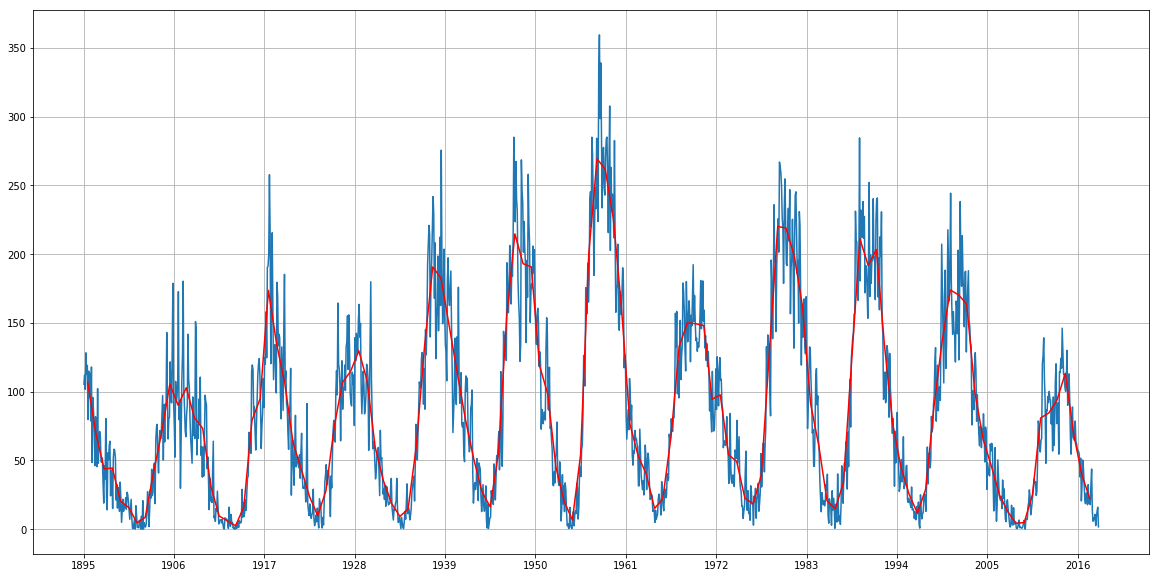

In [6]:
#plot monthy and tear data
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(sun_m_1895["Date (fraction of year)"], sun_m_1895['Monthly Mean Total'])
plt.plot(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = "red")

plt.xticks(np.arange(1895,2020,step =11))
plt.grid()
plt.savefig("year_plot.png")

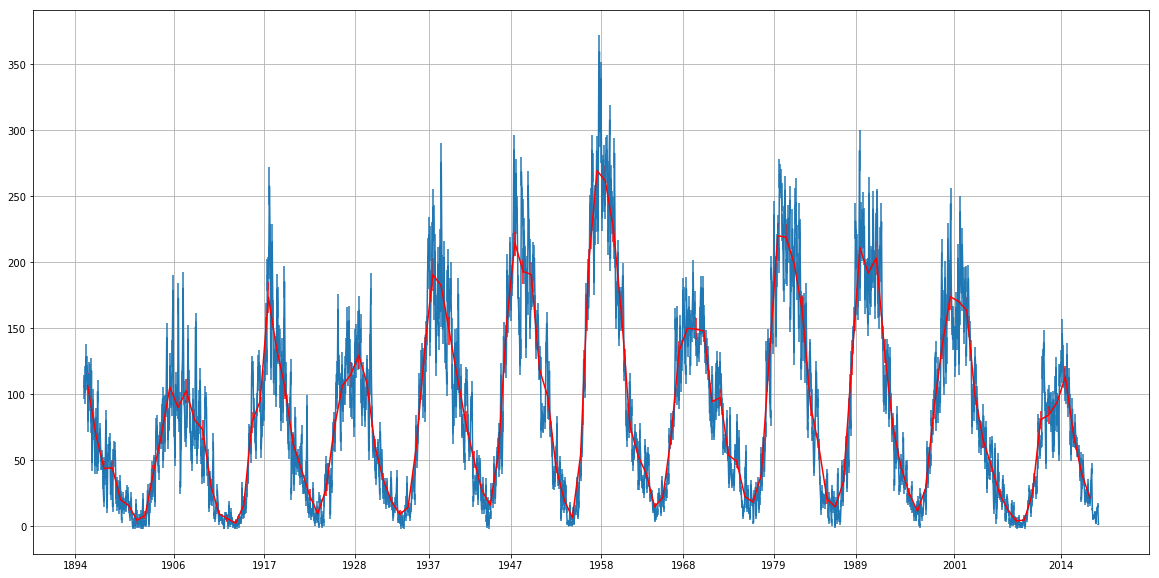

In [7]:
#plot monthly and yearly errorbar
plt.rcParams["figure.figsize"] = (20,10)
plt.errorbar(sun_m_1895["Date (fraction of year)"], sun_m_1895['Monthly Mean Total'], yerr = sun_m_1895["Monthly Mean SD"])
plt.errorbar(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = "red", yerr = sun_y_1895["Yearly Mean SD"])

#list of solar maximum years
solar_max =[1894,1906,1917,1928,1937,1947,1958,1968,1979,1989,2001,2014]
plt.xticks(solar_max)
plt.grid()
plt.savefig("year_error")

# Temperture - Avg

In [8]:
#import temp data
#path_temp = "ftp://ftp.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpcst-v1.0.0-20180705"
path_temp = "temp_avg.txt"
temp_data = pd.read_table(path_temp, sep = "  ", engine = 'python')
temp_data.head()
#alaska data starts at 1925

,Code,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,10021895,43.1,37.4,54.5,63.4,69.5,77.5,79.2,79.5,77.8,59.7,53.2,44.9
1,10021896,43.5,47.7,52.5,68.0,75.9,77.4,81.2,82.2,75.9,63.2,57.3,46.4
2,10021897,41.8,51.1,60.2,62.4,69.0,81.2,81.5,78.8,75.6,67.1,54.2,47.4
3,10021898,49.0,46.1,59.2,58.8,74.1,80.4,80.0,78.8,75.2,61.0,49.8,43.4
4,10021899,43.8,40.0,55.6,61.7,76.1,79.9,80.4,80.9,72.8,66.0,55.3,44.7


In [9]:
#drop all data from 2018 as it is incomplete. incomplete data given -99.90 value
temp_data2 = temp_data[temp_data.Dec != -99.90]

In [10]:
#get only national data
lower_48 = pd.DataFrame(temp_data2[(temp_data2['Code'] < 1110000000) & (temp_data2['Code'] > 1100000000)])

#set year as index
lower_48['Code']  = pd.to_numeric(lower_48['Code'].apply(clean_trim_year))

lower_48 = lower_48.rename(index = str, columns = {'Code':'Year'})
lower_48 = lower_48.set_index('Year')
lower_48.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1895,26.69,26.60,39.97,52.90,59.94,67.80,71.24,71.62,65.57,50.85,39.16,31.71
1896,31.48,35.04,38.03,52.34,62.46,69.89,73.69,72.27,62.94,51.91,38.32,35.55
1897,28.17,33.39,38.79,51.15,61.18,68.11,73.36,71.35,66.40,55.11,40.91,30.76
1898,30.67,35.37,41.05,50.79,59.94,69.31,73.29,72.75,65.46,51.49,38.39,28.67
1899,29.68,25.50,37.63,50.61,59.90,68.65,73.08,71.74,64.80,53.98,44.92,31.62


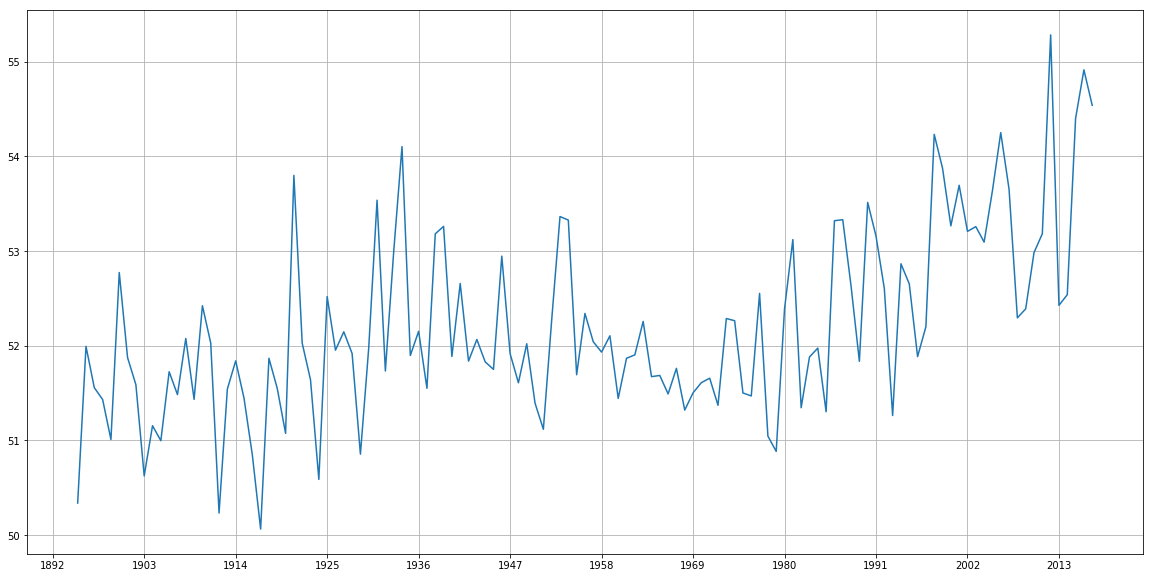

In [11]:
#plt.rcParams["figure.figsize"] = (20,10)
avg_48 = lower_48.mean(axis = 1)
plt.plot(avg_48)

plt.xticks(np.arange(1892,2020,step = 11))
plt.grid()

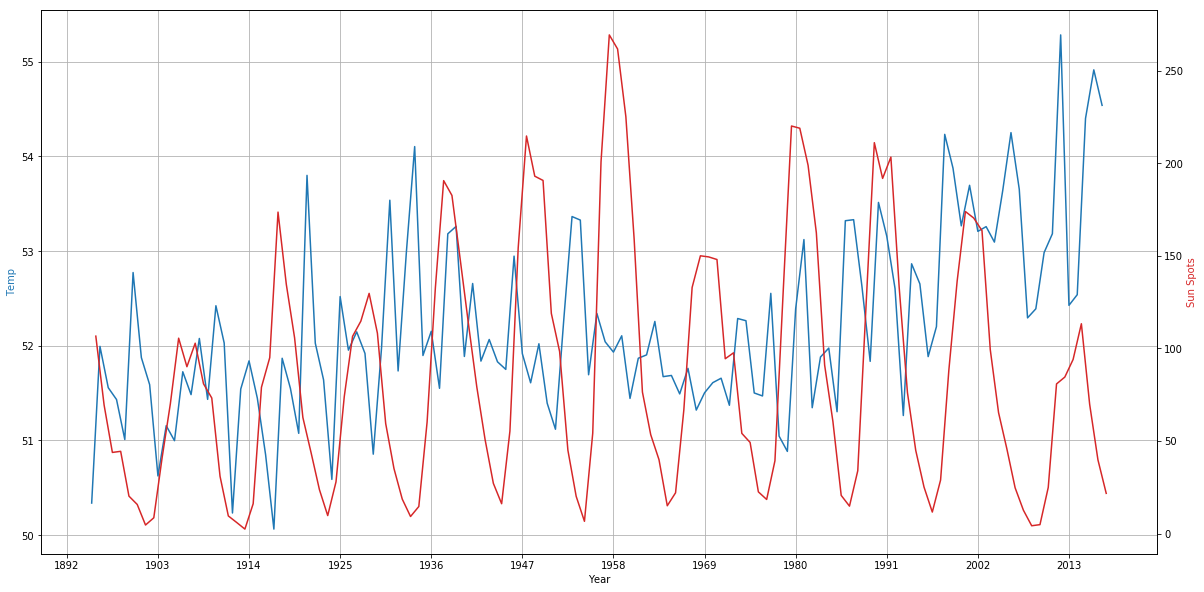

In [12]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temp', color = color)
ax1.plot(avg_48, color = color)

plt.xticks(np.arange(1892,2020,step = 11))
plt.grid()

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Sun Spots', color = color)
ax2.plot(sun_y_1895["Year"], sun_y_1895["Yearly Mean Total Sunspots"], color = color)




## Temperature - Max

In [13]:
#max temp

max_path = "max_raw.csv"
max_raw = pd.read_csv(max_path, sep = "  ", engine='python', 
                      names = ['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
#get only national data
max_nation = pd.DataFrame(max_raw[(max_raw['Year'] < 1110000000) & (max_raw['Year'] > 1100000000)])

#clean year col and reset index
max_nation['Year'] = max_nation['Year'].apply(clean_trim_year)
max_nation = max_nation.reset_index(drop = True)

#drop incomplete data and convert to float64
max_nation.drop(123, inplace = True)
max_nation['June'] = pd.to_numeric(max_nation['June'])
max_nation['July'] = pd.to_numeric(max_nation['July'])
max_nation["Year"] = pd.to_numeric(max_nation["Year"])
max_head = max_nation.head()

In [14]:
#select only summer months data for graph/analysis
max_summer = max_nation[['Year', 'June', 'July', 'Aug']]
#set year as index
max_summer_year = max_summer.set_index(['Year'])
#get avg temp for each year
max_summer_avg = max_summer_year.mean(axis = 1)

max_summer_avg.head()

# #stack data into multi index df
# max_summer_stack = pd.DataFrame(max_summer_year.stack())
# #reset index to numbers
# max_summer_df = max_summer_stack.reset_index()
# max_summer_df.head(15)

Year
1895    83.233333
1896    84.883333
1897    83.936667
1898    84.573333
1899    84.183333
dtype: float64

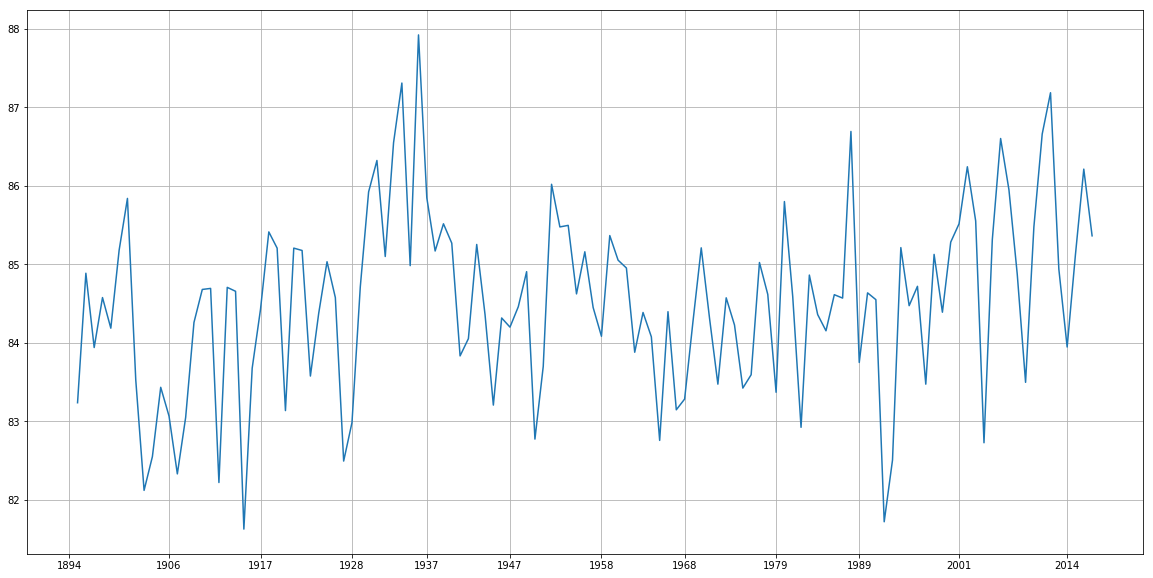

In [15]:
plt.plot(max_summer_avg)
plt.xticks(solar_max)
plt.grid()

## Temperature - Min

In [16]:
#min temp
min_raw = pd.read_csv("min_raw_clean.csv", index_col = 0)

#get only national data
min_nation = pd.DataFrame(min_raw[(min_raw['Year'] < 1110000000) & (min_raw['Year'] > 1100000000)])

#clean year col and reset index
min_nation['Year'] = min_nation['Year'].apply(clean_trim_year)
min_nation = min_nation.reset_index(drop = True)

# #drop incomplete data and convert to float64
min_nation.drop(123, inplace = True)
min_nation.head()

,Year,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,1895,16.52,15.57,27.86,39.45,47.05,54.72,58.55,58.32,52.38,37.15,28.24,21.33
1,1896,21.52,23.52,26.62,40.32,50.14,56.52,61.34,59.13,50.59,39.69,28.17,25.32
2,1897,18.66,23.49,28.27,38.88,47.71,55.31,60.30,58.19,52.77,42.51,29.48,20.88
3,1898,20.57,23.97,29.75,38.05,47.82,56.66,60.31,59.99,52.23,39.54,27.28,18.41
4,1899,19.49,14.65,26.38,38.23,47.57,55.74,59.88,58.69,50.61,42.04,33.94,21.72


In [17]:
#select only winter months data for graph/analysis
min_winter = min_nation[['Year', 'Jan', 'Feb', 'Dec']]
#set year as index
min_winter_year = min_winter.set_index(['Year'])
#stack data to make months a column
min_winter_stack = pd.DataFrame(min_winter_year.stack())
min_winter_df = min_winter_stack.reset_index()
#change Years to integer
min_winter_df["Year"] = pd.to_numeric(min_winter_df['Year'])
min_winter_df.head()

,Year,level_1,0
0,1895,Jan,16.52
1,1895,Feb,15.57
2,1895,Dec,21.33
3,1896,Jan,21.52
4,1896,Feb,23.52


In [18]:


#loop through data and create list of modified years so dec, jan, and feb of one winter can be grouped together

temp_year = []
for index, row in min_winter_df.iterrows():
    if row["level_1"] == "Jan":
        temp_year.append(row["Year"])
        
    elif row["level_1"]  == "Feb":
        temp_year.append(row["Year"])
        
    elif row["level_1"]  == "Dec":
        temp_year.append(row["Year"] + 1)

#create new column with modified years for grouping
min_winter_df["Modified_Year"] = temp_year

min_winter_df.head(10)

,Year,level_1,0,Modified_Year
0,1895,Jan,16.52,1895
1,1895,Feb,15.57,1895
2,1895,Dec,21.33,1896
3,1896,Jan,21.52,1896
4,1896,Feb,23.52,1896
5,1896,Dec,25.32,1897
6,1897,Jan,18.66,1897
7,1897,Feb,23.49,1897
8,1897,Dec,20.88,1898
9,1898,Jan,20.57,1898


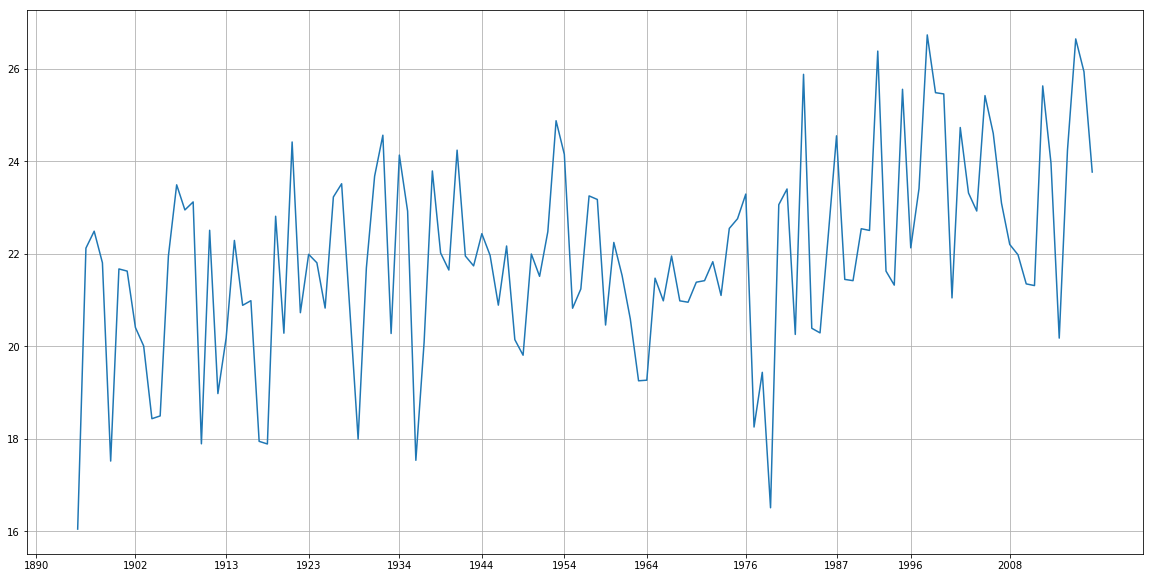

In [19]:
#list of solar minimum years. some minimums are recorded in months other than winter
#acutal solar min: feb 1890, sep 1901, june 1913, april 1923, sep 1933, april 1944
#april 1954, aug 1964, march 1976, sep 1986, may 1999, dec 2008
solar_min = [1890,1902, 1913, 1923, 1934, 1944, 1954, 1964, 1976, 1987, 1996, 2008]

#get avg temp for each winter and graph
min_avg_temp = min_winter_df.groupby(["Modified_Year"]).mean()[0]
plt.plot(min_avg_temp)
plt.xticks(solar_min)
plt.grid()


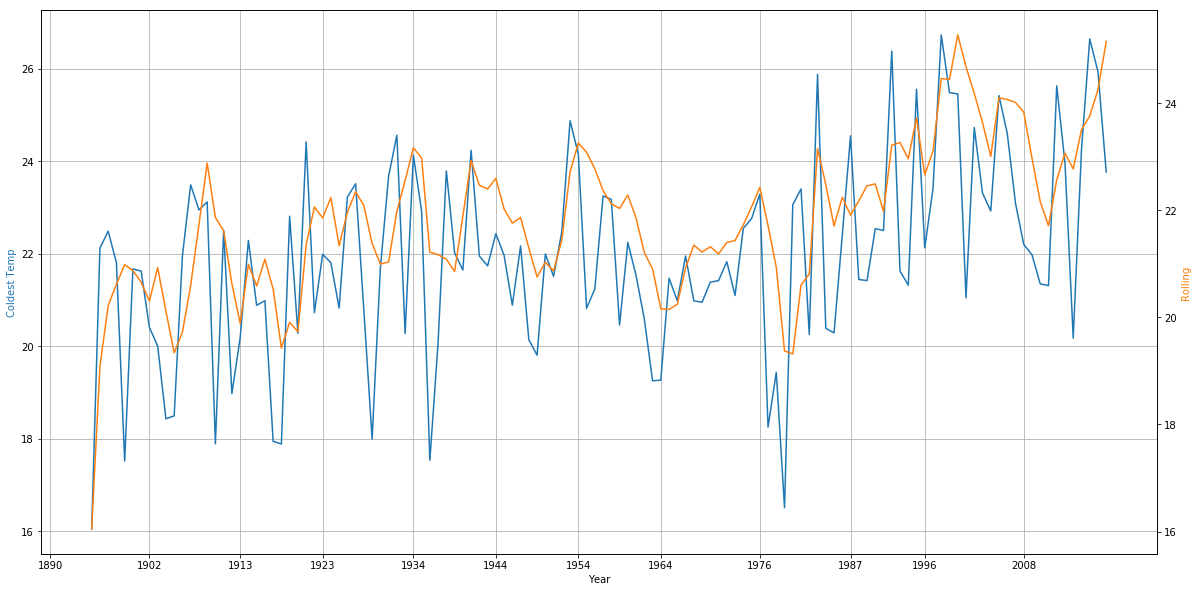

In [20]:
# finding rolling avg temp 
rolling_min = min_avg_temp.rolling(4, min_periods = 1).mean()


fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Coldest Temp', color = color)
ax1.plot(min_avg_temp, color = color)

plt.xticks(solar_min)
plt.grid()

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Rolling', color = color)
ax2.plot(rolling_min, color = color)


## Cooling Days in Summer

In [21]:
cooling_raw = pd.read_csv("cooling_raw.csv", names = ['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

#get only national data
cooling_nation = pd.DataFrame(cooling_raw[(cooling_raw['Year'] < 1110000000) & (cooling_raw['Year'] > 1100000000)])

#clean year col and reset index
cooling_nation['Year'] = cooling_nation['Year'].apply(clean_trim_year)
cooling_nation = cooling_nation.reset_index(drop = True)

# #drop incomplete data and convert to float64
cooling_nation.drop(123, inplace = True)
cooling_nation['Nov'] = pd.to_numeric(cooling_nation["Nov"])
cooling_nation['Year'] = pd.to_numeric(cooling_nation["Year"])
cooling_nation.head()

,Year,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,1895,6,1,13,27,88,225,256,282,190,31,9,3
1,1896,4,4,10,44,161,220,319,299,136,38,19,4
2,1897,3,9,28,29,82,205,333,261,161,56,13,5
3,1898,9,5,20,23,106,235,321,298,176,38,10,3
4,1899,7,5,17,22,125,235,302,296,141,54,11,4


In [22]:
#select only summer months data for graph/analysis
#select summer months and late spring early fall months for comparison
cooling_summer = cooling_nation[['Year', 'June', 'July', 'Aug']]
cooling_expanded = cooling_nation[["Year", 'May', 'June', 'July', 'Aug', "Sept"]]
#set year as index
cooling_summer_year = cooling_summer.set_index(['Year'])
cooling_expanded_year = cooling_expanded.set_index(['Year'])
#get avg temp for each year
cooling_summer_avg = cooling_summer_year.mean(axis = 1)
cooling_expanded_avg = cooling_expanded_year.mean(axis=1)

cooling_summer_avg.head()

Year
1895    254.333333
1896    279.333333
1897    266.333333
1898    284.666667
1899    277.666667
dtype: float64

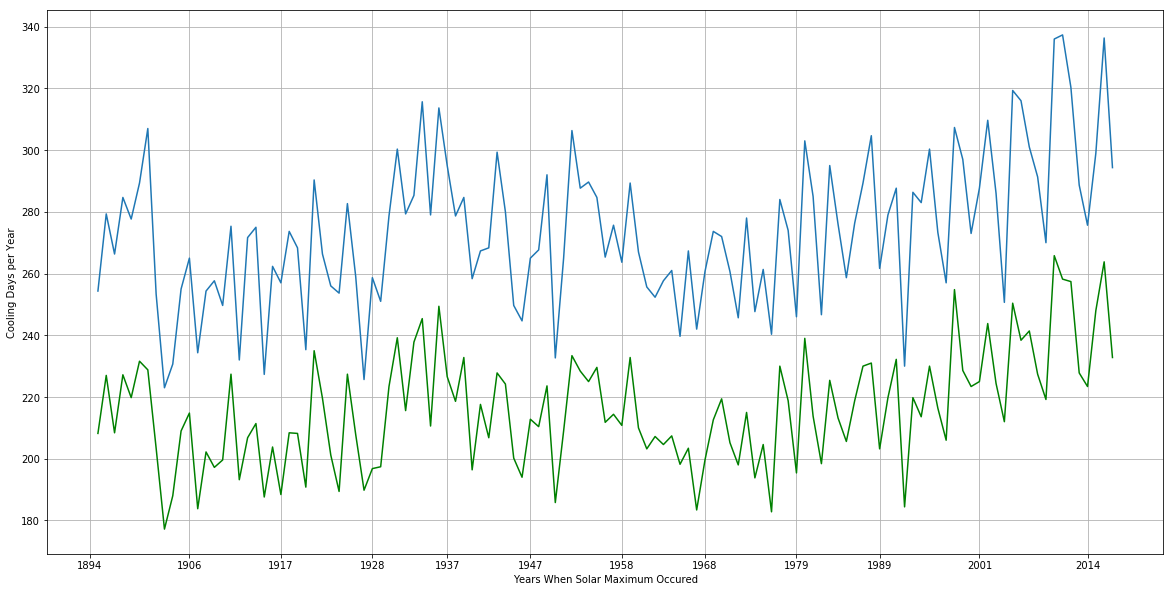

In [23]:
#plot cooling days in summer for each year
plt.plot(cooling_summer_avg)
plt.plot(cooling_expanded_avg, color = "green")
plt.xticks(solar_max)
plt.ylabel("Cooling Days per Year")
plt.xlabel("Years When Solar Maximum Occured")
plt.grid()

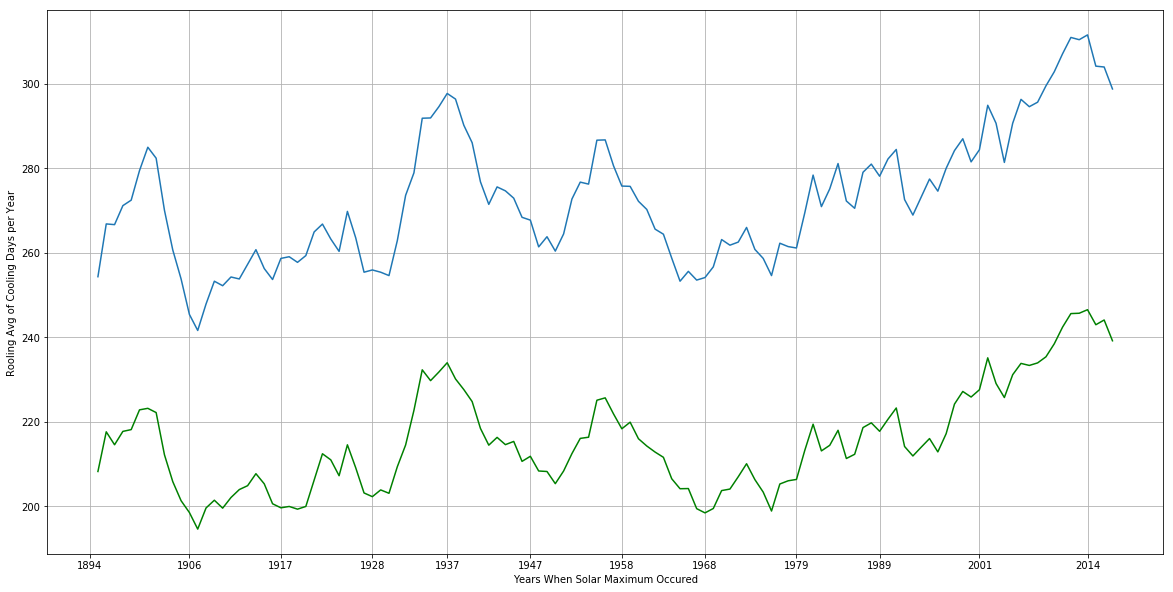

In [24]:
#plot rolling avg of cooling days
rolling_cooling = cooling_summer_avg.rolling(5, min_periods = 1).mean()
rolling_expanded_cooling = cooling_expanded_avg.rolling(5, min_periods = 1).mean()

plt.plot(rolling_cooling)
plt.plot(rolling_expanded_cooling, color = "green")
plt.ylabel("Rooling Avg of Cooling Days per Year")
plt.xlabel("Years When Solar Maximum Occured")
plt.xticks(solar_max)
plt.grid()

## Heating Days in Winter

In [25]:
heating_raw = pd.read_csv("heating_raw.csv", names = ['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

#get only national data
heating_nation = pd.DataFrame(heating_raw[(heating_raw['Year'] < 1110000000) & (heating_raw['Year'] > 1100000000)])

#clean year col and reset index
heating_nation['Year'] = heating_nation['Year'].apply(clean_trim_year)
heating_nation = heating_nation.reset_index(drop = True)

# #drop incomplete data and convert to float64
heating_nation.drop(123, inplace = True)
heating_nation['May'] = pd.to_numeric(heating_nation["May"])
heating_nation['Year'] = pd.to_numeric(heating_nation["Year"])
heating_nation.head()

,Year,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,1895,1017,974,692,345,155,34,19,17,59,388,600,843
1,1896,916,749,736,307,116,37,7,15,103,346,557,819
2,1897,987,749,646,356,171,55,10,22,63,253,579,874
3,1898,886,747,569,396,173,33,9,11,55,301,642,929
4,1899,937,945,703,351,169,37,10,21,85,257,516,858


In [26]:
#select only winter months data for graph/analysis
#select expand winter months
heating_winter = heating_nation[['Year', 'Jan', 'Feb', 'Dec']]
heating_expanded_winter = heating_nation[['Year', 'Jan', 'Feb','March','Nov', 'Dec']]

#set year as index
heating_winter_year = heating_winter.set_index(['Year'])
heating_expanded_winter_year = heating_expanded_winter.set_index(['Year'])

#stack data to make months a column
heating_winter_stack = pd.DataFrame(heating_winter_year.stack())
heating_winter_df = heating_winter_stack.reset_index()
heating_expanded_winter_stack = pd.DataFrame(heating_expanded_winter_year.stack())
heating_expanded_winter_df = heating_expanded_winter_stack.reset_index()

#change Years to integer
heating_winter_df["Year"] = pd.to_numeric(heating_winter_df['Year'])
heating_expanded_winter_df["Year"] = pd.to_numeric(heating_expanded_winter_df['Year'])
heating_expanded_winter_df.head(10)

,Year,level_1,0
0,1895,Jan,1017
1,1895,Feb,974
2,1895,March,692
3,1895,Nov,600
4,1895,Dec,843
5,1896,Jan,916
6,1896,Feb,749
7,1896,March,736
8,1896,Nov,557
9,1896,Dec,819


In [27]:
#loop through data and create list of modified years so dec, jan, and feb of one winter can be grouped together

h_year = []
for index, row in heating_winter_df.iterrows():
    if row["level_1"] == "Jan":
        h_year.append(row["Year"])
        
    elif row["level_1"]  == "Feb":
        h_year.append(row["Year"])
        
    elif row["level_1"]  == "Dec":
        h_year.append(row["Year"] + 1)

#create new column with modified years for grouping
heating_winter_df["Modified_Year"] = h_year

heating_winter_df.head(10)

,Year,level_1,0,Modified_Year
0,1895,Jan,1017,1895
1,1895,Feb,974,1895
2,1895,Dec,843,1896
3,1896,Jan,916,1896
4,1896,Feb,749,1896
5,1896,Dec,819,1897
6,1897,Jan,987,1897
7,1897,Feb,749,1897
8,1897,Dec,874,1898
9,1898,Jan,886,1898


In [28]:
#loop through data and create list of modified years so dec, jan, and feb of one winter can be grouped together

h_exp_year = []
for index, row in heating_expanded_winter_df.iterrows():
    if row["level_1"] == "Jan":
        h_exp_year.append(row["Year"])
        
    elif row["level_1"]  == "Feb":
        h_exp_year.append(row["Year"])
        
    elif row["level_1"]  == "March":
        h_exp_year.append(row["Year"])        
        
    elif row["level_1"]  == "Nov":
        h_exp_year.append(row["Year"] + 1)        
        
    elif row["level_1"]  == "Dec":
        h_exp_year.append(row["Year"] + 1)

#create new column with modified years for grouping
heating_expanded_winter_df["Modified_Year"] = h_exp_year

heating_expanded_winter_df.head(10)

,Year,level_1,0,Modified_Year
0,1895,Jan,1017,1895
1,1895,Feb,974,1895
2,1895,March,692,1895
3,1895,Nov,600,1896
4,1895,Dec,843,1896
5,1896,Jan,916,1896
6,1896,Feb,749,1896
7,1896,March,736,1896
8,1896,Nov,557,1897
9,1896,Dec,819,1897


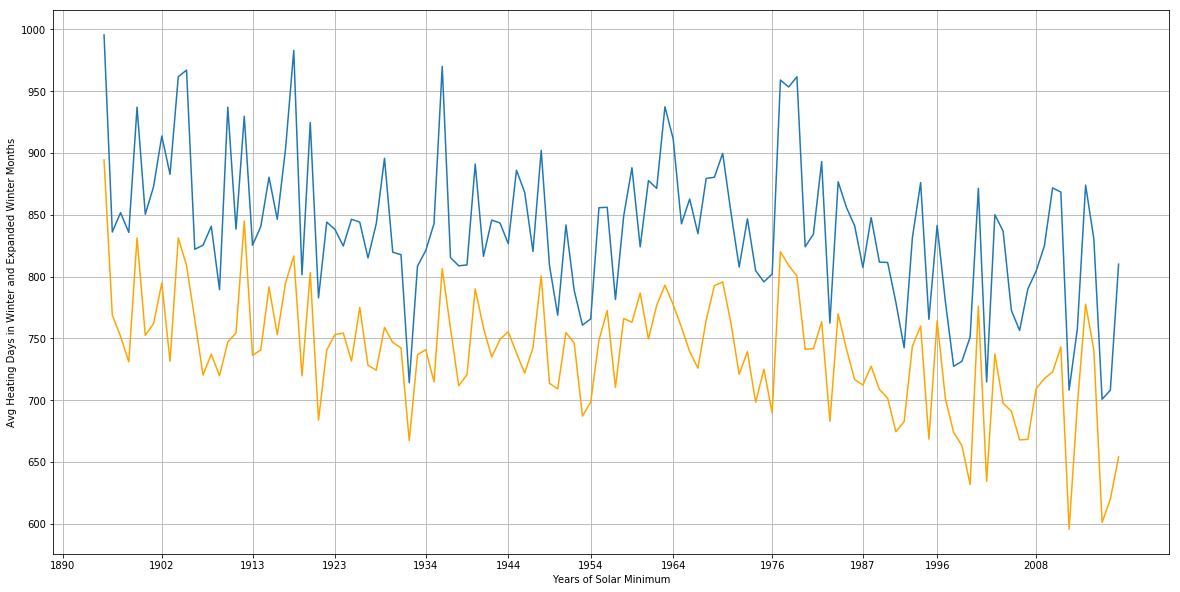

In [29]:
#get avg temp for each winter and expanded winter and graph
heating_avg = heating_winter_df.groupby(["Modified_Year"]).mean()[0]
heating_expanded_avg = heating_expanded_winter_df.groupby(["Modified_Year"]).mean()[0]

plt.plot(heating_avg)
plt.plot(heating_expanded_avg, color = "orange")
plt.ylabel('Avg Heating Days in Winter and Expanded Winter Months')
plt.xlabel("Years of Solar Minimum")
plt.xticks(solar_min)
plt.grid()

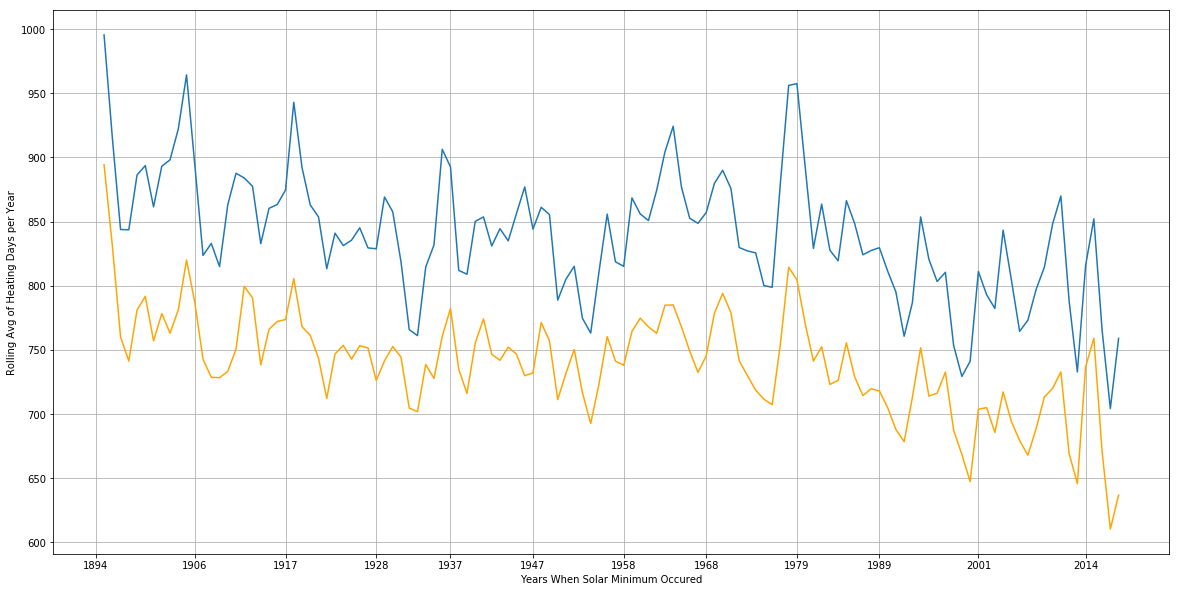

In [30]:
#plot rolling avg of heating days
rolling_heating = heating_avg.rolling(2, min_periods = 1).mean()
rolling_expanded_heating = heating_expanded_avg.rolling(2, min_periods = 1).mean()

plt.plot(rolling_heating)
plt.plot(rolling_expanded_heating, color = "orange")
plt.ylabel("Rolling Avg of Heating Days per Year")
plt.xlabel("Years When Solar Minimum Occured")
plt.xticks(solar_max)
plt.grid()

Text(0,0.5,'Temp')

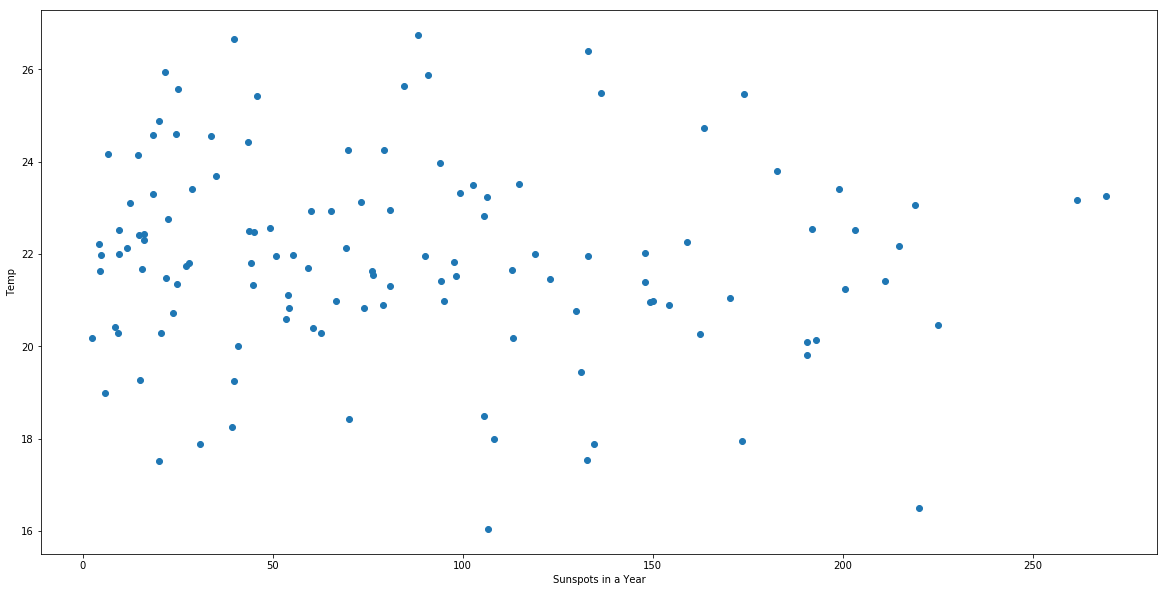

In [31]:
#drop incomplete year and create df 
min_temp_compare = min_avg_temp.drop(2018)
min_temp_compare_df = pd.DataFrame(min_temp_compare)

#plotting number of sunspots vs average minimum temp for winter months
plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], min_temp_compare_df[0])
plt.xlabel('Sunspots in a Year')
plt.ylabel('Temp')

In [32]:
#getting rollin avg of heating days to smooth out data
rolling_heating_compare = rolling_heating.drop(2018)
rolling_heating_compare_df = pd.DataFrame(rolling_heating_compare)

Text(0,0.5,'Number of Heating Days per Winter')

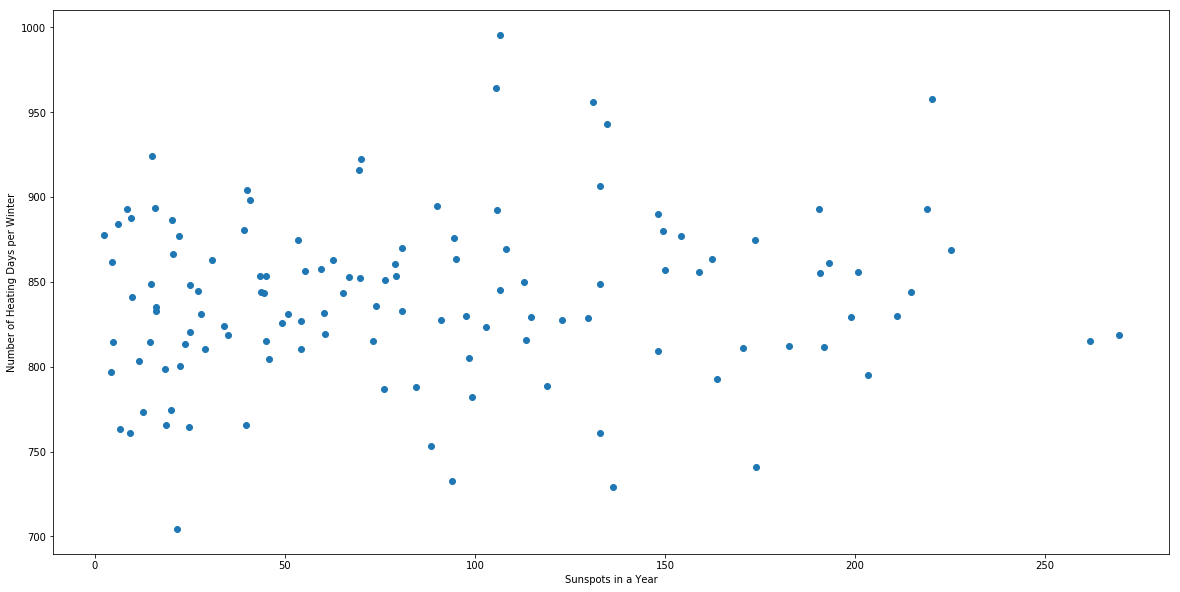

In [33]:
#plot the sunspots vs rolling heating data
plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], rolling_heating_compare_df[0])
plt.xlabel('Sunspots in a Year')
plt.ylabel('Number of Heating Days per Winter')

In [34]:
#Central Engalnd Temp (CET) 
#Reading in average CET. Already split by season. DJF = Dec, Jan, Feb, etc.
CET = pd.read_table('CET_AVG.txt', delim_whitespace = True)
#drop years before 1895
CET_1895 = CET[CET['Year']>=1895]
CET_1895 = CET_1895.reset_index(drop=True)
CET_1895.head()

,Year,DJF,MAM,JJA,SON
0,1895,1.2,8.6,15.3,10.0
1,1896,4.4,9.2,15.6,8.1
2,1897,3.8,7.9,15.9,9.9
3,1898,5.4,7.7,15.1,11.2
4,1899,5.8,7.6,16.9,10.2


Text(0,0.5,'Temp (C)')

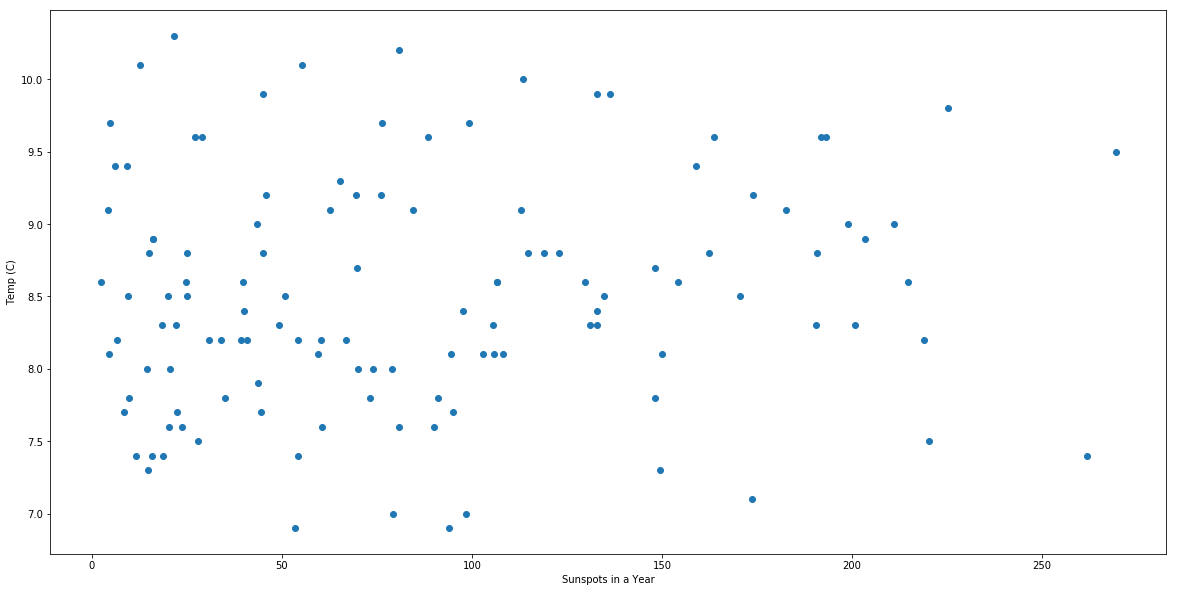

In [35]:
#plot of CET vs Sunspots. Tried all CET groups with no clear realationship. March, April, May shown

plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], CET_1895['MAM'])
plt.xlabel('Sunspots in a Year')
plt.ylabel('Temp (C)')

In [36]:
#table of avg minimum temp in central england grouped by season

CET_MIN = pd.read_table('CET_MIN.txt', delim_whitespace = True)

CET_MIN_1895 = CET_MIN[CET_MIN['Year']>=1895]
CET_MIN_1895 = CET_MIN_1895.reset_index(drop=True)
CET_MIN_1895.head()

,Year,DJF,MAM,JJA,SON
0,1895,-1.5,4.4,10.8,6.2
1,1896,2.0,5.0,11.0,5.1
2,1897,1.6,4.2,11.5,6.5
3,1898,2.9,3.9,10.6,7.8
4,1899,3.0,3.6,11.7,6.6


Text(0,0.5,'Temp (C)')

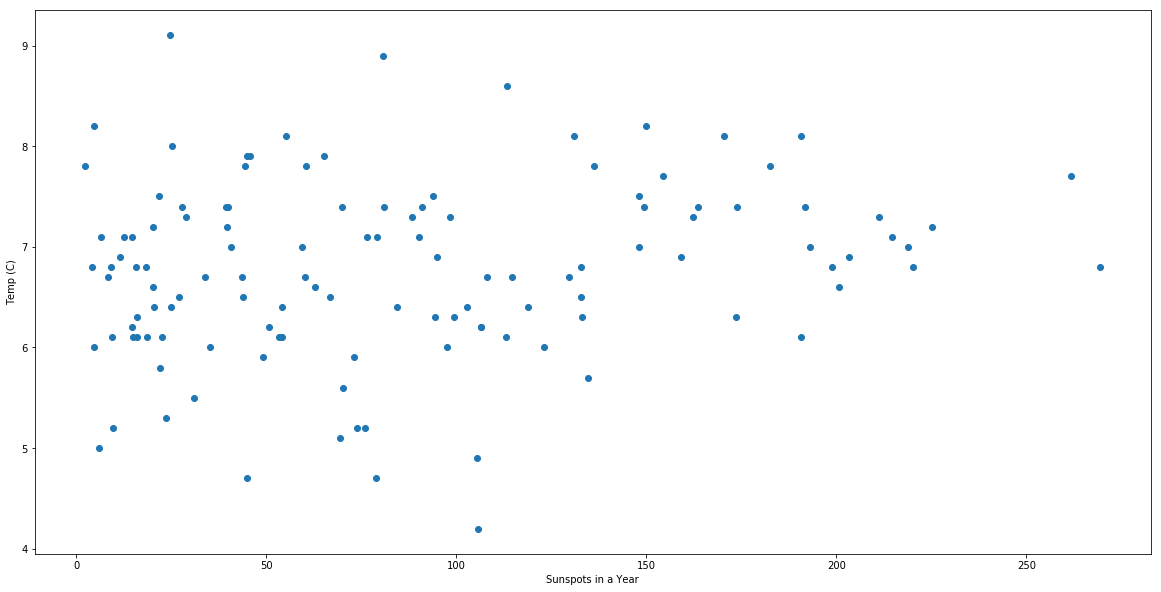

In [37]:
#CET avg minimum seasonal temps vs sunspots.  tried all 4 seasons
plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], CET_MIN_1895['SON'])
plt.xlabel('Sunspots in a Year')
plt.ylabel('Temp (C)')

In [38]:
#table of average maximum temp for each season
CET_MAX = pd.read_table('CET_MAX.txt', delim_whitespace = True)

CET_MAX_1895 = CET_MAX[CET_MAX['Year']>=1895]
CET_MAX_1895 = CET_MAX_1895.reset_index(drop=True)
CET_MAX_1895.head()

,Year,DJF,MAM,JJA,SON
0,1895,3.8,12.8,19.7,13.8
1,1896,6.9,13.4,20.1,11.1
2,1897,6.0,11.6,20.4,13.2
3,1898,7.9,11.4,19.6,14.6
4,1899,8.6,11.6,22.2,13.7


Text(0,0.5,'Temp (C)')

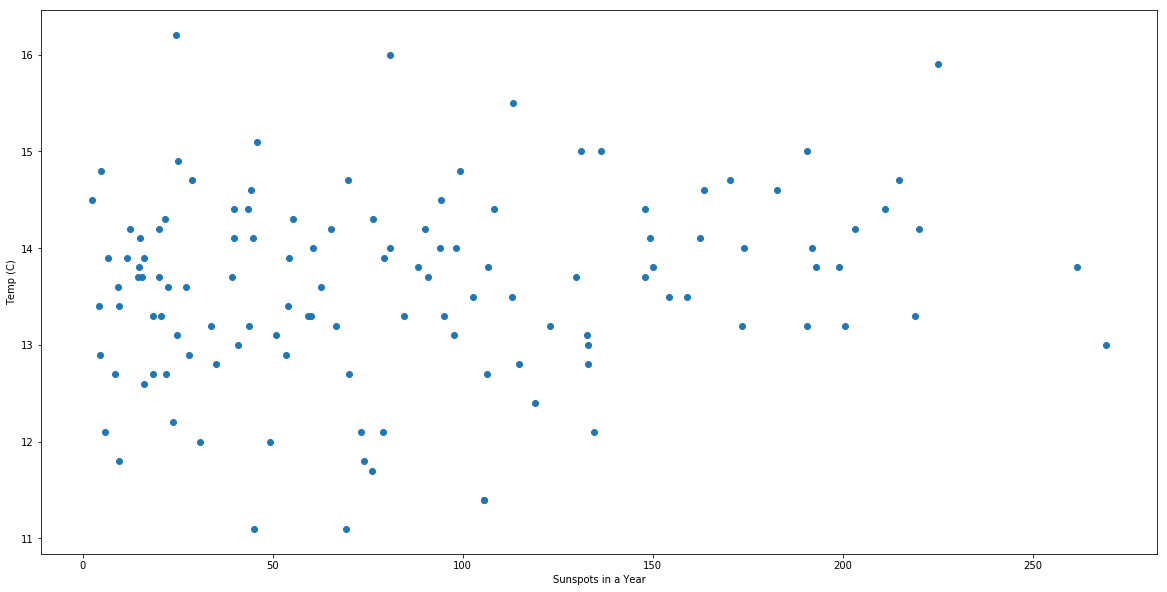

In [39]:
#plot of average max temp for season vs sunspots.  Sept, Oct, Nov shown
plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], CET_MAX_1895['SON'])
plt.xlabel('Sunspots in a Year')
plt.ylabel('Temp (C)')

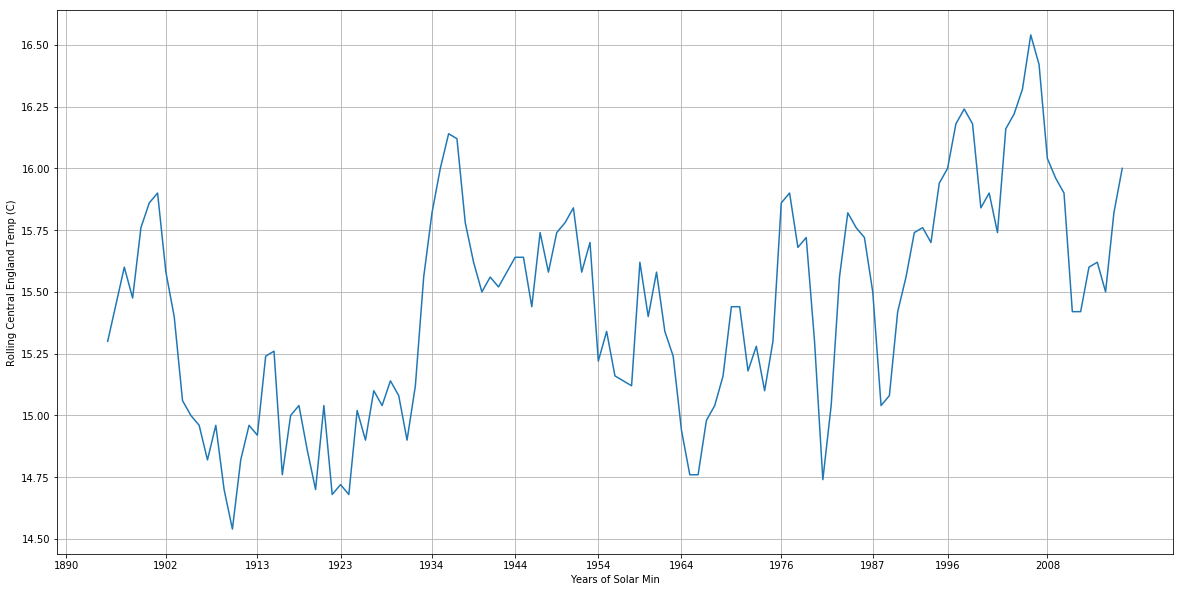

In [40]:
#trying rolling average of CET
CET_roll = CET_1895['JJA'].rolling(5, min_periods = 1).mean()

plt.plot(CET_1895['Year'], CET_roll)
plt.xticks(solar_min)
plt.xlabel('Years of Solar Min')
plt.ylabel('Rolling Central England Temp (C)')
plt.grid()

In [41]:
#table of Land and Ocean Yearly temperature Anomalies
#emperature anomaly means a departure from a reference value or long-term average

LO_Y_ANOM = pd.read_table('LO_Y_ANOM.txt', sep = ',')
LO_Y_1895 = LO_Y_ANOM[LO_Y_ANOM["Year"]>=1895]
LO_Y_1895 = LO_Y_1895.reset_index(drop=True)
LO_Y_1895.head()

,Year,Value
0,1895,-0.22
1,1896,-0.09
2,1897,-0.11
3,1898,-0.25
4,1899,-0.11


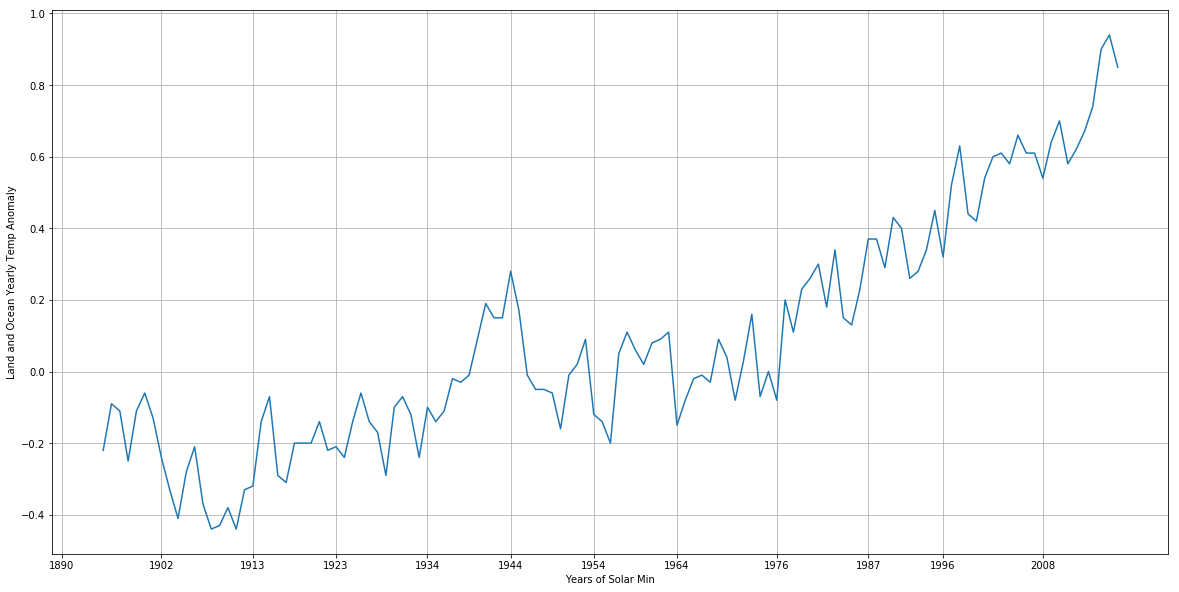

In [42]:
#plotting change in Land and Ocean Yearly temp Anomalies over time
plt.plot(LO_Y_1895["Year"], LO_Y_1895["Value"])
plt.xticks(solar_min)
plt.xlabel("Years of Solar Min")
plt.ylabel("Land and Ocean Yearly Temp Anomaly")
plt.grid()

Text(0,0.5,'Temp Anomaly in a Year (C)')

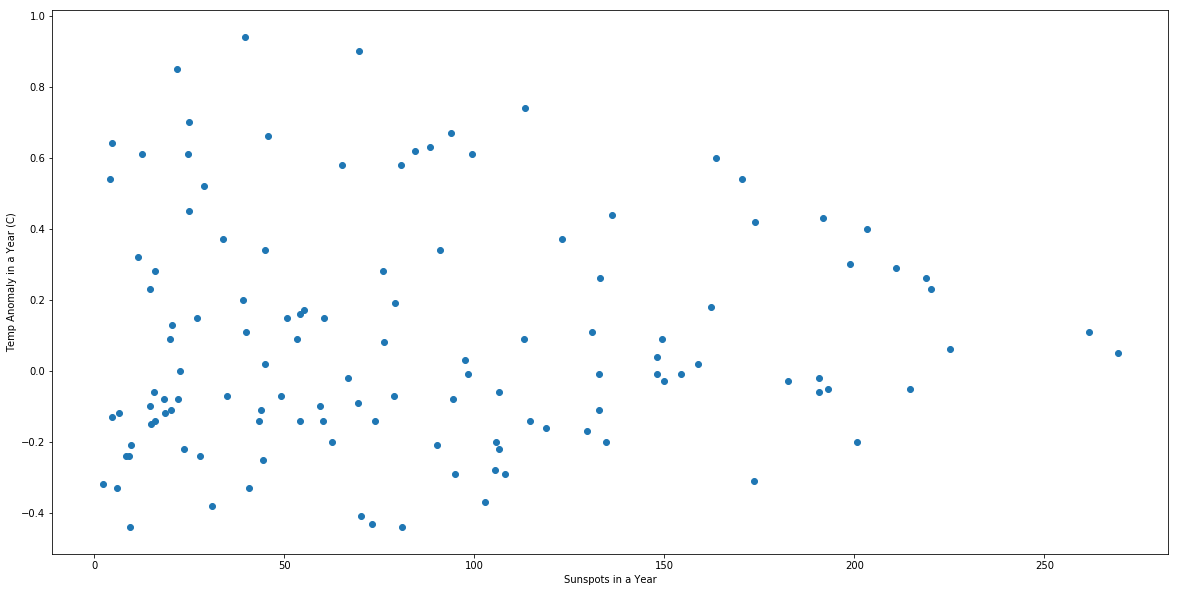

In [43]:
#plotting Sunspots vs Land and Ocean Yearly temp Anomaly
plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], LO_Y_1895["Value"])
plt.xlabel('Sunspots in a Year')
plt.ylabel('Temp Anomaly in a Year (C)')

In [44]:
#table of Land and Ocean Monthly temp Anomalies
LO_M = pd.read_table('LO_M_ANOM.txt', sep = ',')
LO_M_1895 = LO_M[(LO_M['Year']>189500) & (LO_M['Year']<201800)]
#201800
LO_M_1895 = LO_M_1895.reset_index(drop = True)
LO_M_1895.head()

,Year,Value
0,189501,-0.44
1,189502,-0.41
2,189503,-0.28
3,189504,-0.17
4,189505,-0.20


In [45]:
#Selcting only winter months
LO_M_W = LO_M_1895[(LO_M_1895["Year"]%100 == 1) | (LO_M_1895["Year"]%100 == 2) | (LO_M_1895["Year"]%100 == 12)]
LO_M_W.head()

,Year,Value
0,189501,-0.44
1,189502,-0.41
11,189512,-0.07
12,189601,-0.10
13,189602,-0.07


In [46]:
#add 1 to all year values for Dec months to group them with next years Jan and Feb
#remove months and reduce to normal YYYY format
Mod_Year = []
for i, row in LO_M_W.iterrows():
    if row["Year"]%100 == 12:
        year_fix = ((row['Year'] - 12)/100) +1
        Mod_Year.append(year_fix)
        
    elif row['Year']%100 == 1:
        year_fix = (row['Year'] -1)/100
        Mod_Year.append(year_fix)
        
    elif row['Year']%100 == 2:
        year_fix = (row['Year'] -2)/100
        Mod_Year.append(year_fix)
  


In [47]:
#replace year with modified years
LO_M_W['Year'] = Mod_Year


C:\Users\AJGra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
LO_M_W.head()

,Year,Value
0,1895.0,-0.44
1,1895.0,-0.41
11,1896.0,-0.07
12,1896.0,-0.10
13,1896.0,-0.07


In [49]:
#get average of each year's winter temp anomaly and drop 2018 data
LO_M_W_group = LO_M_W.groupby(['Year']).mean()
LO_M_W_group = LO_M_W_group.drop(2018.0)

Text(0,0.5,'Land and Ocean temp Anomaly for Winter Months Each Year')

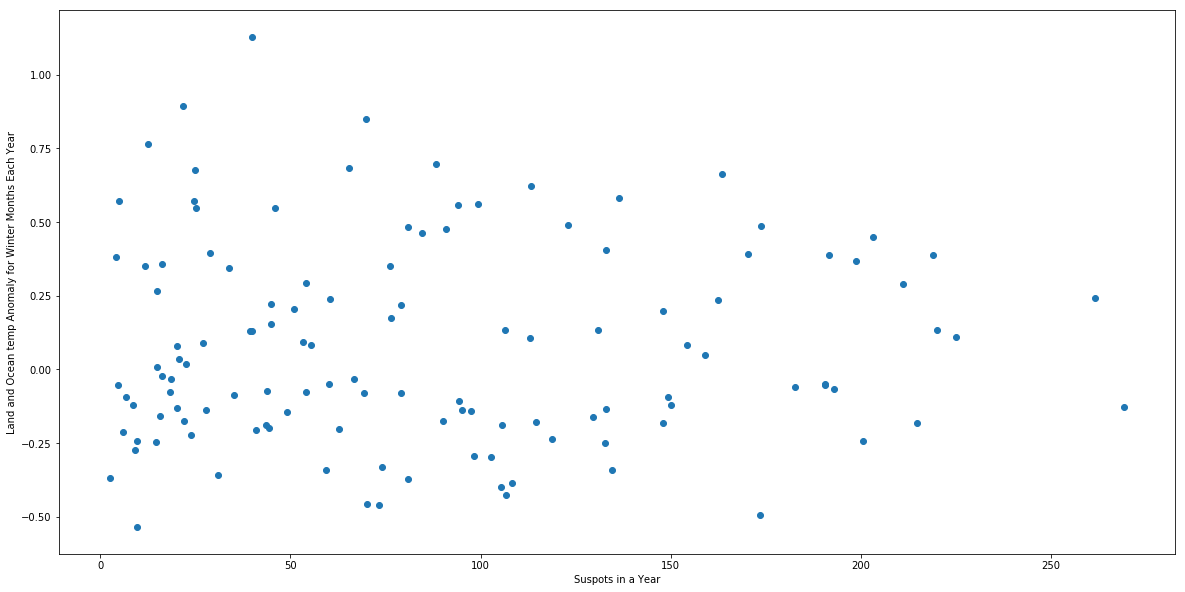

In [50]:
#plot yearly sunspots vs Land and Ocean Monthly avg Anomaly for winter months
plt.scatter(sun_y_1895['Yearly Mean Total Sunspots'], LO_M_W_group['Value'])
plt.xlabel('Suspots in a Year')
plt.ylabel('Land and Ocean temp Anomaly for Winter Months Each Year')